##### Note 
Note that there is a python version that creates the csv files of this document, to save time 

In [1]:
import sys

sys.path.append('../../../common_code')
from PostProcessingScripts import * 
from formation_channels import * 
import astropy.stats

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

##########
# define colors for formation channels 
channelColorDict = {'classic':'#118AB2', 'stable B no CEE':'orange',  'immediate CE': '#EF476F'  , r'double-core CE':'#073B4C', 'other':'gray', 'vi':'cyan', 'vii':'#FFD166'}
List_formationchannelOptions = ['All',  'classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'vi', 'vii', 'other']
ind_formationchannelOptions = [7,  1, 2, 3, 4, 5, 6, 0]
dictFormationChannelIndex =  {List_formationchannelOptions[i]: ind_formationchannelOptions[i] for i in range(len(List_formationchannelOptions))}

channelColorDict_lighter = {'classic':adjust_lightness(color='#118AB2', amount=1.6),'stable B no CEE':adjust_lightness(color='orange', amount=1.4), 'immediate CE':adjust_lightness(color='#EF476F', amount=1.2),\
                            r'double-core CE':adjust_lightness(color='#073B4C', amount=1.8), 'other':adjust_lightness(color='gray', amount=1.5),  'vi':adjust_lightness(color='cyan', amount=1.5), 'vii':adjust_lightness(color='#FFD166', amount=1.2)}
channelList = ['classic', 'stable B no CEE', 'vii',  'immediate CE',  r'double-core CE', 'other'] #, 'vi']
#######

import pandas as pd
from pathlib import Path

In [2]:
def obtain_redshiftsruns(pathData = '/Volumes/SimonsFoundation/DataDCO/'):
    BPSmodelName='B'
    DCOtype='BNS'
    path_ = '/Volumes/SimonsFoundation/DataDCO/' + alphabetDirDict[BPSmodelName] +'/'
    path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'
    fdata = h5.File(path, 'r')
    redshifts = fdata['redshifts']['redshift'][...].squeeze()
    fdata.close()
    return redshifts 





adjustedChannelList = ['classic', 'stable B no CEE', 'vii', 'immediate CE',  r'double-core CE', 'other']
pathData='/Volumes/SimonsFoundation/DataDCO/' # path to datafiles 
redshifts_runs = obtain_redshiftsruns(pathData = pathData) # obtain redshifts that were run 
print('available redshifts:', redshifts_runs) 

print(MSSFRnameslist)

available redshifts: [0.19230769 0.57692308 0.96153846 1.34615385 1.73076923 2.11538462
 2.5        2.88461538 3.26923077 3.65384615 4.03846154 4.42307692
 4.80769231 5.19230769 5.57692308 5.96153846 6.34615385 6.73076923
 7.11538462 7.5        7.88461538 8.26923077 8.65384615 9.03846154
 9.42307692 9.80769231]
['000', '111', '112', '113', '121', '122', '123', '131', '132', '133', '211', '212', '213', '221', '222', '223', '231', '232', '233', '311', '312', '313', '321', '322', '323', '331', '332', '333']


In [170]:

def plot_xparam_formation_channels_redshift_for_quantiles(axe='None', DCOtype='BHNS', BPS_models_to_run_list=['A'],  pathData='/Volumes/SimonsFoundation/DataDCO/',\
                                                  plot_total_median="False",  mask_specific_mssfr=None, whichQuantity='median', value_for_fraction=False, \
                                              add_model_label=True, quantile_values=[0.5, 0.25, 0.75], xparam='log10_t_delay' , weights_type='merger', single_model=True, create_df_file=True):
    
    
    
    adjustedChannelList, DCOname = dict_channel_list[DCOtype], DCOname_dict[DCOtype]
    
    
    for ind_bps, BPSmodelName in enumerate(BPS_models_to_run_list):
        pd_file_path = './formation_median/'+ xparam_wanted + '_' + DCOtype + '_' + BPSmodelName + '_' + xparam_wanted + '_w_' + weights_type + '.csv'
        
        if create_df_file==True: df = create_pd_redshift_from_xparam(quantile_values=quantile_values, BPSmodelName=BPSmodelName, DCOtype=DCOtype, xparam=xparam, weights_type=weights_type, pd_file_path=pd_file_path)
        else: df = pd.read_csv(pd_file_path)
        redshifts = df["redshift"]
        
        

        # plot the channel 
        for ind_mssfr, mssfr in enumerate(MSSFRnameslist[1:]):
#         for ind_mssfr, mssfr in enumerate([MSSFRnameslist[1]]):
            
            for nrC, Channel in enumerate(adjustedChannelList): 
            
                c_FC = channelColorDict[Channel]
                colors_lighter_FC =  channelColorDict_lighter[Channel]

                column_names = [Channel + 'xyz_' + mssfr+ ' q_' + str(quantile_values[i]) for i in range(len(quantile_values))] # creates array with header names 
                qvalues = [df[column_names[i]] for i in range(len(quantile_values))]

#                 axe.scatter((redshifts), qvalues[0].values, color=c_FC, marker=dictMarkerShape[BPSmodelName], s=40) #/norm_classic_tdelay
#                 axe.plot(   (redshifts), qvalues[0].values, color=c_FC, lw=4) #, ls=linestyles_mssfrind[ind_mssfr_zind])
                
                
                if len(quantile_values)>1: # if more than one quantile (median) is given, plot the other quantiles as filled between 
                    axe.fill_between((redshifts), y1=qvalues[1], y2=qvalues[0], color=colors_lighter_FC, alpha=0.5)
                    axe.fill_between((redshifts), y1=qvalues[0], y2=qvalues[2], color=colors_lighter_FC, alpha=0.5)

                    axe.fill_between((redshifts), y1=qvalues[3], y2=qvalues[1], color=colors_lighter_FC, alpha=0.2)
                    axe.fill_between((redshifts), y1=qvalues[2], y2=qvalues[4], color=colors_lighter_FC, alpha=0.2)


                    
            if plot_total_median==True:
                pd_file_path_total = './formation_median/'+ xparam_wanted + '_' + DCOtype + '_' + BPSmodelName + '_' + xparam_wanted + '_w_' + weights_type + 'total.csv'
                print(pd_file_path_total)
                df_total = pd.read_csv(pd_file_path_total)
                column_names = ['all_' + 'xyz_' + mssfr+ ' q_' + str(quantile_values[i]) for i in range(len(quantile_values))] # creates array with header names 
                qvalues = [df_total[column_names[i]] for i in range(len(quantile_values))]               
#                 axe.scatter((redshifts), qvalues[0].values, color="k", marker="o", s=40) #/norm_classic_tdelay
                axe.plot(   (redshifts), qvalues[0].values, color="gray", lw=3) #, ls=linestyles_mssfrind[ind_mssfr_zind])

    

    xlabel = r'\textbf{redshift} $z$'
    
    if xparam=='chirp_mass_LVK':
        ylabel = r'$\mathcal{M}_{\rm{c}} \ [M_{\odot}]$'
    elif xparam=='mass_tot':
        ylabel = r'$\rm{M}_{\rm{tot}} \ [M_{\odot}]$'
    elif xparam=='mass_ratio_LVK':
        ylabel = r'$q$'
    elif xparam=='mass_1_LVK':
        ylabel = r'$m_1 [M_{\odot}]$'
    elif xparam=='mass_2_LVK':
        ylabel = r'$m_2 [M_{\odot}]$'
    elif xparam=='log10_t_delay':
        ylabel = r'$\log_{10} t_{\rm{delay}} \ [\rm{Gyr}]$'
    elif xparam=='t_delay':
        ylabel = r'$t_{\rm{delay}} \ [\rm{Gyr}]$'
    elif xparam=='M1ZAMS':
        ylabel = r'$\rm{M}_{\rm{ZAMS, 1}} \ [M_{\odot}]$'
    elif xparam=='M2ZAMS':
        ylabel = r'$\rm{M}_{\rm{ZAMS, 2}} \ [M_{\odot}]$'
    elif xparam=='qZAMS':
        ylabel = r'${q}_{\rm{ZAMS}} $'
    elif xparam=='separationInitial':
        ylabel = r'${a}_{\rm{ZAMS}} [\rm{AU}] $'      
    

    # axes properties 
    axe = layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=True)
    axe.set_xlim(0,9.7)  # redshift range 
    if xparam in ['t_delay', 'separationInitial']:
        axe.set_yscale('log')
    
    ## add label in a legend for plot 
    if single_model==True: annotate_label = r'\textbf{model %s:}'%(BPSmodelName) +'\n' + alphabetPhysicalNameDict[BPSmodelName]
    else: annotate_label = r'\textbf{%s}'%(DCOtype)        
    bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
    axe.annotate(annotate_label, xy=(0.042, .95), xycoords='axes fraction', fontsize = fs-6, weight = 'bold', ha='left', va="top",bbox=bbox_props, zorder=100)             
            
            
            
    return axe












### To figure out individual panels 

at xparam  separationInitial
at DCOtype = BHNS


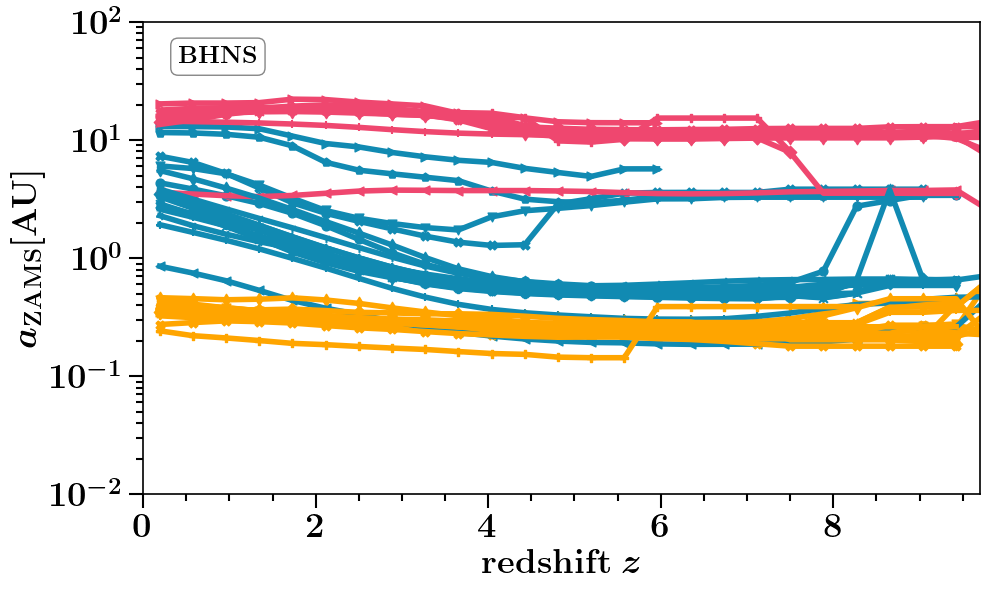

In [124]:
# single panels: TRY 



################ CHANGE THE THINGS BELOW ################
# whichQuantity = 'median'
pathData='/Volumes/SimonsFoundation/DataDCO/'
only_channels_with_min_contribution = 0.01 # percent
dict_channel_list = {'BBH':['classic', 'stable B no CEE'],\
                     'BHNS':['classic', 'stable B no CEE', 'immediate CE'],\
                     'BNS':['classic', r'double-core CE', 'other'] } 

quantile_values=[0.5]
DCOTypeList = ['BHNS'] 
plot_total_median = False #  True # False #True 
weights_type='merger'# 'formation' #
single_model= False # True #True #False # True # False # True # False # True #False
create_df_file = False
edited_BPSnameslist =  ['A' ,'B', 'C', 'D',  'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T']#   
#['B', 'C', 'D']
#['A',   'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T']  # ['A', 'B', 'C', 'D',  'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T'] # no 'E',
###########################################################




# for xparam_wanted in [ 'mass_tot', 't_delay', 'mass_ratio_LVK', 'mass_1_LVK', 'mass_2_LVK','chirp_mass_LVK','qZAMS', 'separationInitial''mass_1_LVK', 'mass_2_LVK']:  't_delay', 'mass_ratio_LVK', 'qZAMS', 'chirp_mass_LVK'
for xparam_wanted in ['separationInitial']: #,  'mass_ratio_LVK', 'qZAMS', 'separationInitial', 't_delay','M1ZAMS', 'M2ZAMS','t_delay']:  #'t_delay', 'mass_ratio_LVK', 'qZAMS',]: # , 'mass_ratio_LVK', 'qZAMS', 'separationInitial', 'M1ZAMS', 'M2ZAMS', 'mass_1_LVK', 'mass_2_LVK']: #, 'M1ZAMS', 'M2ZAMS']:
    print('at xparam ', xparam_wanted)
    
    if single_model==True:enumerate_list = edited_BPSnameslist[:]
    else: enumerate_list = [0]
    for ind_m, BPSmodelName in  enumerate(enumerate_list):
        if single_model==True:
            BPS_models_to_run_list=[BPSmodelName]
            print('at BPS model ', BPSmodelName)
            save_fig_string = BPSmodelName
        else: 
            BPS_models_to_run_list = edited_BPSnameslist
            save_fig_string = 'all'
            
        for DCOtype in DCOTypeList: #'BNS', 'BHNS', 
            print('at DCOtype =', DCOtype)


            ncols, nrows= 1,1
            f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(10,6), gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})

            ax = plot_xparam_formation_channels_redshift_for_quantiles(axe=ax, DCOtype=DCOtype, BPS_models_to_run_list=BPS_models_to_run_list,\
                                                                  pathData=pathData,  single_model=single_model, quantile_values=quantile_values,\
                                                                               xparam=xparam_wanted, weights_type=weights_type, create_df_file=create_df_file, plot_total_median=plot_total_median) 

#             ax.set_ylim(3,20)
            ax.set_ylim(0.01,1E2)
#             ax.set_ylim(0.3, 0.9)
            
            ##  SAVE FIG  ###
            plt.tight_layout()
            plt.subplots_adjust(wspace=0., hspace=0.18)  
            plt.savefig('./aZAMS_allBHNS.png', transparent=False, dpi=300)
#             plt.savefig('./formation_median/'+ xparam_wanted + '/zQuantile_' +  DCOtype + '_' + save_fig_string + '_' + xparam_wanted + '_w_' + weights_type + '.png', transparent=False, dpi=300)
            plt.show()
            plt.close()
            print()







In [80]:
def plot_redshift_rate_single_panel(axe='None', whichplot='rate', DCOtype='BHNS', \
                                          BPSmodelName='A', redshifts=[0], pathData='/Volumes/SimonsFoundation/DataDCO/', singlemssfr=False, plot_fraction=False, plot_model_legend=True, plot_formation_channels=True):
    """
    whichplot='rate', 'ratio'
    
    """

    
    adjustedChannelList = ['classic', 'stable B no CEE', 'immediate CE',  r'double-core CE', 'other'] # 'vii', 
    
    DCOname = DCOname_dict[DCOtype]


    full_data_path  = pathData + alphabetDirDict[BPSmodelName] +'/' + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5' # path for files 
    fdata = h5.File(full_data_path,'r')         # read in data 
    
    
    if singlemssfr==False:
        MSSFRs = MSSFRnameslist
    else:
        MSSFRs = [singlemssfr]
    
    for ind_mssfr, mssfr in enumerate(MSSFRs[1:]): 
        fparam_key = "formationchannel_z_rates"
        header = "rate_" + "total" + "_" + mssfr 
        totals_z =  fdata[fparam_key][header][...].squeeze()  
        if plot_fraction==False:
            axe.plot(redshifts[:], totals_z, color='k', lw=1, ls='dashed', alpha=0.7, zorder=1)
#         axe.scatter(redshifts, totals_z, color='k', markersize=4)
        
        if plot_formation_channels==True:
            for nrC, Channel in enumerate(adjustedChannelList): 
                c_FC = channelColorDict[Channel]

                fparam_key_fc = "formationchannel_z_rates"
                fractions_z = np.zeros_like(redshifts)
                header_fc = "fraction_" + Channel + "_" + mssfr 
                if plot_fraction==False:
                    fc_rates_z =  fdata[fparam_key_fc][header_fc][...].squeeze() * totals_z
                else:
                    fc_rates_z =  fdata[fparam_key_fc][header_fc][...].squeeze()
                axe.plot(redshifts, fc_rates_z, color=c_FC, lw=1, zorder=3)
#                 axe.scatter(redshifts, fc_rates_z, color=c_FC, zorder=3)



            
            
            
            
    fdata.close()

    if plot_model_legend==True:
        bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
        axe.annotate(r'\textbf{model %s: }'%(BPSmodelName) + alphabetPhysicalNameDict[BPSmodelName], xy=(0.985, .95),\
                     xycoords='axes fraction', fontsize = fs-3, weight = 'bold', ha='right', va="top",bbox=bbox_props,\
                    zorder=1E10)    
        
    return axe



at xparam  mass_1_LVK
at BPS model  G
at DCOtype = BHNS


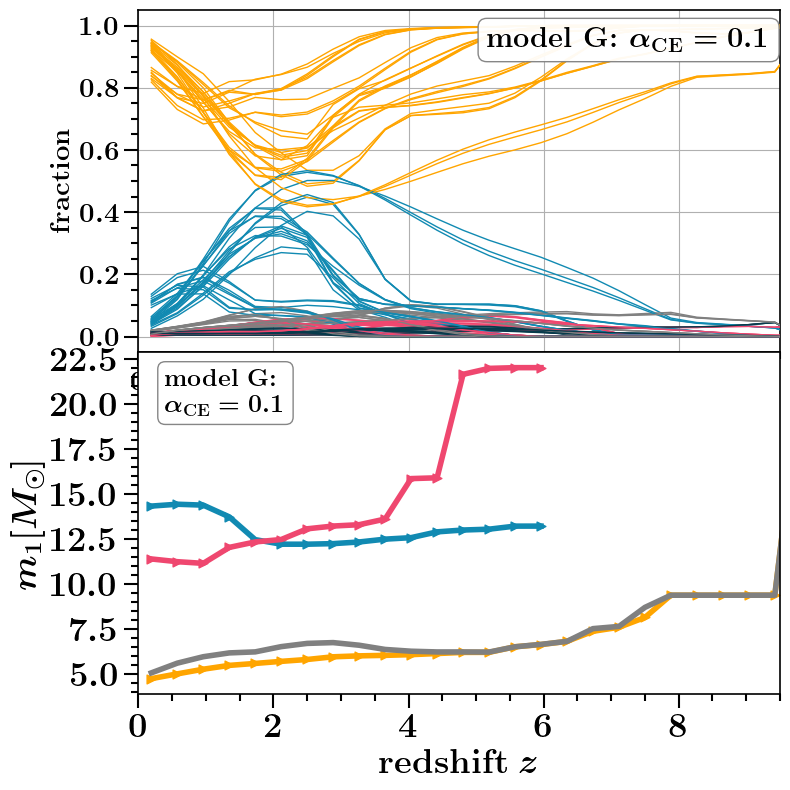

In [119]:
############################
### change these lines below ###
pathData='/Volumes/SimonsFoundation/DataDCO/' # path to datafiles 
DCOtype='BHNS'  # which DCO type to run
BPSmodelName = "G" # which BPS model to run for 
############################

redshifts_runs, ncols, nrows = obtain_redshiftsruns(pathData = pathData), 1,3
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(8,8), gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.asarray([1,1])})
# create the data and plot for figure:





ax[0] = plot_redshift_rate_single_panel(axe=ax[0], DCOtype=DCOtype,redshifts=redshifts_runs, BPSmodelName=BPSmodelName, pathData=pathData, \
                                     plot_fraction=True, plot_model_legend=True, plot_formation_channels=True)

#### make up ax[0]es ####
fs_label, ylabel, xlabel = 20, r'$\textbf{fraction}$' , r'$\textbf{redshift } z$'
ax[0] = layoutAxes(ax[0], nameX=xlabel, nameY=ylabel, fontsize=fs_label)
ax[0].grid(True)
ax[0].set_xlim(0,9.5)


## SECOND AXIS ## 
################ CHANGE THE THINGS BELOW ################
# whichQuantity = 'median'
pathData='/Volumes/SimonsFoundation/DataDCO/'
only_channels_with_min_contribution = 0.01 # percent
dict_channel_list = {'BBH':['classic', 'stable B no CEE'],\
                     'BHNS':['classic', 'stable B no CEE', 'immediate CE'],\
                     'BNS':['classic', r'double-core CE', 'other'] } 

quantile_values=[0.5]
DCOTypeList = ['BHNS'] 
plot_total_median = True 
weights_type='merger'# 'formation' #
single_model= True # False # True # False # True #False
create_df_file = False
edited_BPSnameslist = [BPSmodelName]# ['A' , 'B', 'C', 'D',  'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T']
###########################################################




# for xparam_wanted in [ 'mass_tot', 't_delay', 'mass_ratio_LVK', 'mass_1_LVK', 'mass_2_LVK','chirp_mass_LVK','qZAMS', 'separationInitial''mass_1_LVK', 'mass_2_LVK']:  't_delay', 'mass_ratio_LVK', 'qZAMS', 'chirp_mass_LVK'
for xparam_wanted in ['mass_1_LVK']: #,  'mass_ratio_LVK', 'qZAMS', 'separationInitial', 't_delay','M1ZAMS', 'M2ZAMS','t_delay']:  #'t_delay', 'mass_ratio_LVK', 'qZAMS',]: # , 'mass_ratio_LVK', 'qZAMS', 'separationInitial', 'M1ZAMS', 'M2ZAMS', 'mass_1_LVK', 'mass_2_LVK']: #, 'M1ZAMS', 'M2ZAMS']:
    print('at xparam ', xparam_wanted)
    
    if single_model==True:enumerate_list = edited_BPSnameslist[:]
    else: enumerate_list = [0]
    for ind_m, BPSmodelName in  enumerate(enumerate_list):
        if single_model==True:
            BPS_models_to_run_list=[BPSmodelName]
            print('at BPS model ', BPSmodelName)
            save_fig_string = BPSmodelName
        else: 
            BPS_models_to_run_list = edited_BPSnameslist
            save_fig_string = 'all'
            
        for DCOtype in DCOTypeList: #'BNS', 'BHNS', 
            print('at DCOtype =', DCOtype)


            ax[1] = plot_xparam_formation_channels_redshift_for_quantiles(axe=ax[1], DCOtype=DCOtype, BPS_models_to_run_list=BPS_models_to_run_list,\
                                                                  pathData=pathData,  single_model=single_model, quantile_values=quantile_values,\
                                                                               xparam=xparam_wanted, weights_type=weights_type, create_df_file=create_df_file, plot_total_median=plot_total_median) 

#             ax[1].set_ylim(0,1)
            ax[1].set_xlim(0,9.5)
#             ax.set_ylim(0.01,1E1)
            


# ##  SAVE FIG  ###
plt.tight_layout()
plt.subplots_adjust(wspace=0., hspace=0.0)  
# plt.savefig('./modelH_exampleBHNS.png', transparent=True, dpi=400)
# # plt.savefig('./ratesz_' + 'simalar'  + '_' + DCOtype  + '.pdf', transparent=False)
plt.show()




In [ ]:
####### BHNS BNS AND BBH next to each other 

at xparam  mass_1_LVK
at DCOtype = BHNS
./formation_median/mass_1_LVK_BHNS_A_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_A_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_A_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_A_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_A_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_A_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_A_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_A_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_A_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_A_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_A_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_A_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_A_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_A_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_A

./formation_median/mass_1_LVK_BHNS_I_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_I_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_J_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_J_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_J_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_J_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_J_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_J_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_J_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_J_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_J_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_J_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_J_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_J_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_J_mass_1_LVK_w_mergertotal.csv
./formatio

./formation_median/mass_1_LVK_BHNS_P_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_P_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_P_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_P_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_P_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_P_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_P_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_Q_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_Q_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_Q_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_Q_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_Q_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_Q_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_Q_mass_1_LVK_w_mergertotal.csv
./formation_median/mass_1_LVK_BHNS_Q_mass_1_LVK_w_mergertotal.csv
./formatio

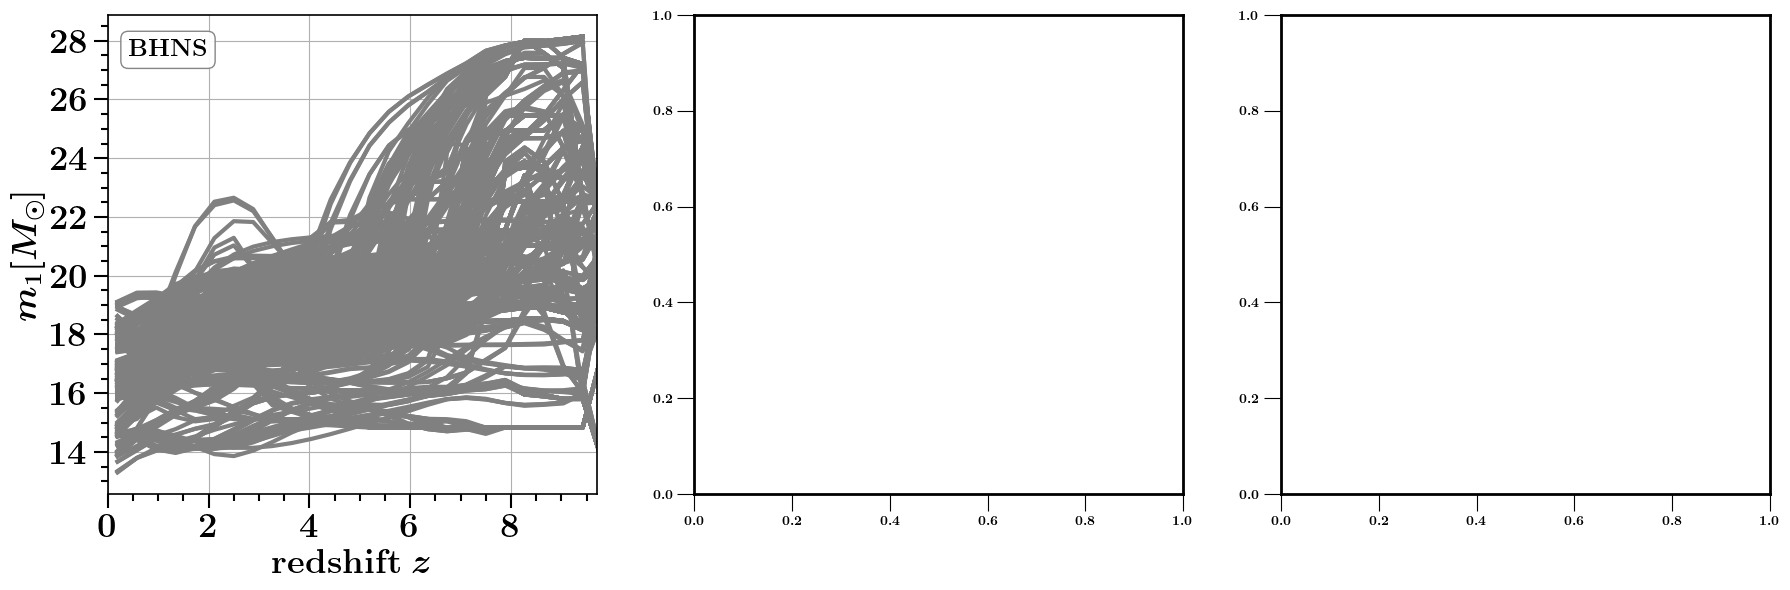

In [173]:
# single panels: TRY 

ncols =3
nrows =1 
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(18,6), gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})



################ CHANGE THE THINGS BELOW ################
# whichQuantity = 'median'
pathData='/Volumes/SimonsFoundation/DataDCO/'
only_channels_with_min_contribution = 0.01 # percent
dict_channel_list = {'BBH':['classic', 'stable B no CEE'],\
                     'BHNS':['classic', 'stable B no CEE', 'immediate CE'],\
                     'BNS':['classic', r'double-core CE']} #, 'other'] } 

quantile_values=[0.5]
DCOTypeList = ['BBH'] 
plot_total_median = True # False #True # False #  True # False #True 
weights_type='merger'# 'formation' #
single_model= False # True #True #False # True # False # True # False # True #False
create_df_file = False
edited_BPSnameslist =  ['A' ,'B', 'C', 'D',  'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T']#   
#['B', 'C', 'D']
#['A',   'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T']  # ['A', 'B', 'C', 'D',  'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T'] # no 'E',
###########################################################


for ind_dcotemp, DCOtemp in enumerate(['BHNS']): #BBH
    DCOTypeList = [DCOtemp]
    ax = axe[ind_dcotemp]
    

    # for xparam_wanted in [ 'mass_tot', 't_delay', 'mass_ratio_LVK', 'mass_1_LVK', 'mass_2_LVK','chirp_mass_LVK','qZAMS', 'separationInitial''mass_1_LVK', 'mass_2_LVK']:  't_delay', 'mass_ratio_LVK', 'qZAMS', 'chirp_mass_LVK'
    for xparam_wanted in ['mass_1_LVK']: #,  'mass_ratio_LVK', 'qZAMS', 'separationInitial', 't_delay','M1ZAMS', 'M2ZAMS','t_delay']:  #'t_delay', 'mass_ratio_LVK', 'qZAMS',]: # , 'mass_ratio_LVK', 'qZAMS', 'separationInitial', 'M1ZAMS', 'M2ZAMS', 'mass_1_LVK', 'mass_2_LVK']: #, 'M1ZAMS', 'M2ZAMS']:
        print('at xparam ', xparam_wanted)

        if single_model==True:enumerate_list = edited_BPSnameslist[:]
        else: enumerate_list = [0]
        for ind_m, BPSmodelName in  enumerate(enumerate_list):
            if single_model==True:
                BPS_models_to_run_list=[BPSmodelName]
                print('at BPS model ', BPSmodelName)
                save_fig_string = BPSmodelName
            else: 
                BPS_models_to_run_list = edited_BPSnameslist
                save_fig_string = 'all'

            for DCOtype in DCOTypeList: #'BNS', 'BHNS', 
                print('at DCOtype =', DCOtype)


                ncols, nrows= 1,1
                ax = plot_xparam_formation_channels_redshift_for_quantiles(axe=ax, DCOtype=DCOtype, BPS_models_to_run_list=BPS_models_to_run_list,\
                                                                      pathData=pathData,  single_model=single_model, quantile_values=quantile_values,\
                                                                                   xparam=xparam_wanted, weights_type=weights_type, create_df_file=create_df_file, plot_total_median=plot_total_median) 

#     ax.set_ylim(5,80)
#     ax.set_ylim(0.01,1E2)
    ax.grid(True)
#     ax.set_ylim(0.3, 1)

##  SAVE FIG  ###
plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.0)  
# plt.savefig('./tdelay_all.png', transparent=False, dpi=300)
#             plt.savefig('./formation_median/'+ xparam_wanted + '/zQuantile_' +  DCOtype + '_' + save_fig_string + '_' + xparam_wanted + '_w_' + weights_type + '.png', transparent=False, dpi=300)
plt.show()
plt.close()
print()







## only make plots of existing data 

In [ ]:
print(BPSnameslist)
print(BPSnameslistslistslist)

at xparam  t_delay
['A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T']
at DCOtype = BHNS
inside plot ['A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T']


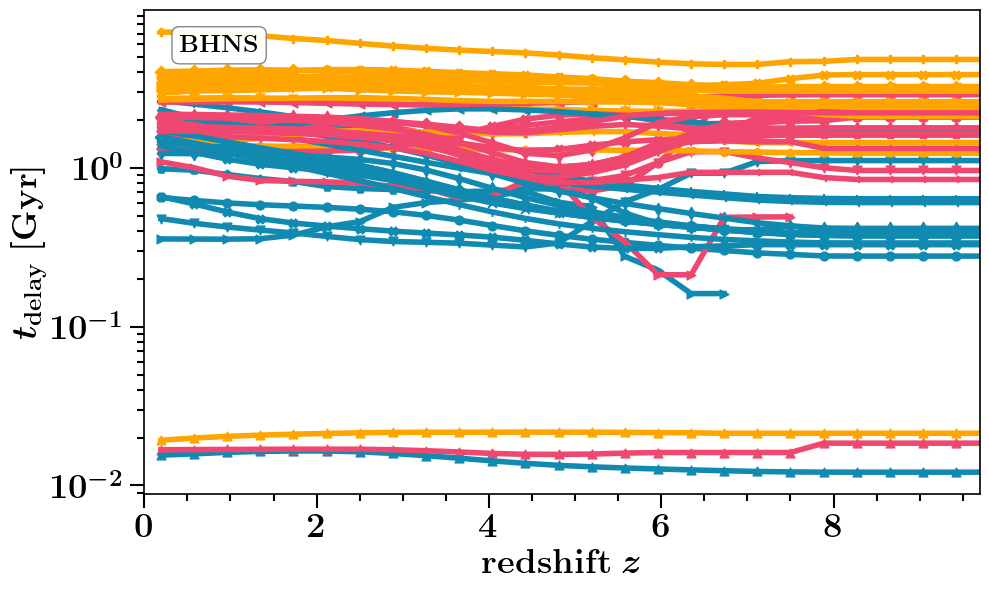


at DCOtype = BNS
inside plot ['A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T']


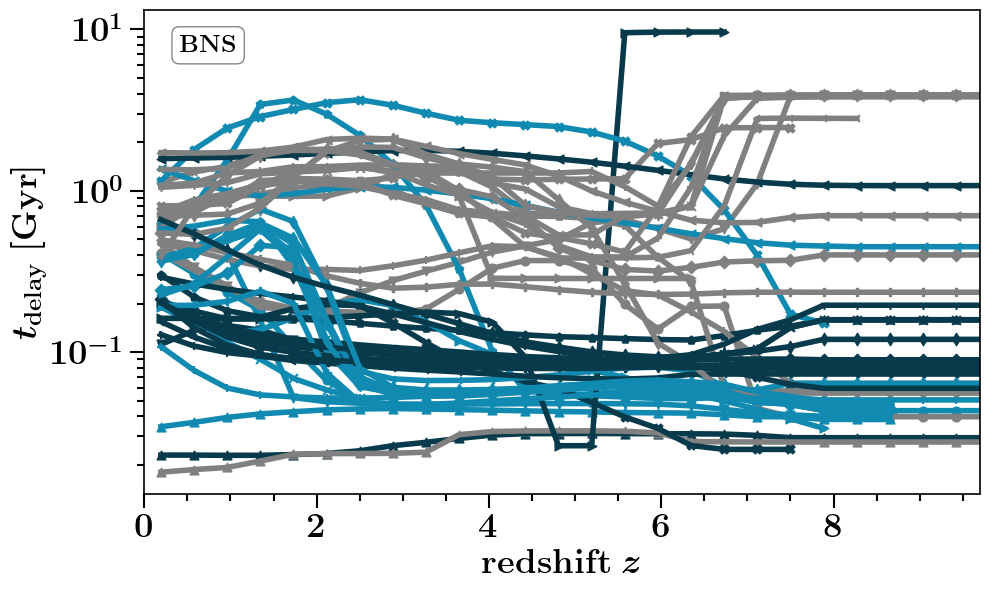

In [49]:

################ CHANGE THE THINGS BELOW ################
quantile_values=[0.5] #, 0.25, 0.75, 0.1, 0.9 ]
DCOTypeList = ['BHNS', 'BNS'] #, https://arxiv.org/pdf/2402.00935.pdf
pathData='/Volumes/SimonsFoundation/DataDCO/'
single_model=False # True ; we want all models in one plot :) 
only_channels_with_min_contribution = 0.01 # percent
dict_channel_list = {'BBH':['classic', 'stable B no CEE'],\
                     'BHNS':['classic', 'stable B no CEE', 'immediate CE'],\
                     'BNS':['classic', r'double-core CE', 'other'] } 
weights_type='formation' #'merger'
create_df_file = False ## !! This is important if you only want to run the existing data 
###########################################################




# for xparam_wanted in [ 'mass_tot', 't_delay', 'mass_ratio_LVK', 'mass_1_LVK', 'mass_2_LVK','chirp_mass_LVK','qZAMS', 'separationInitial']:  't_delay', 'mass_ratio_LVK', 'qZAMS', 
for xparam_wanted in [ 't_delay']: # , 'mass_ratio_LVK', 'qZAMS', 'separationInitial', 'M1ZAMS', 'M2ZAMS', 'mass_1_LVK', 'mass_2_LVK']: #, 'M1ZAMS', 'M2ZAMS']:
    print('at xparam ', xparam_wanted)
    
    if single_model==True:enumerate_list = BPSnameslist[:].remove('E')
    else: enumerate_list = [0]
    for ind_m, BPSmodelName in  enumerate(enumerate_list): # I dont want to work with model E anymore 
        if single_model==True:
            BPS_models_to_run_list=[BPSmodelName]
            print('at BPS model ', BPSmodelName)
            save_fig_string = BPSmodelName
        else: 
            BPS_models_to_run_list = BPSnameslist
            print(BPSnameslist)
            BPS_models_to_run_list #.remove('E') # I dont want to work with model E anymore 
            save_fig_string = 'all'
        
        
        for DCOtype in DCOTypeList: #'BNS', 'BHNS', 
            print('at DCOtype =', DCOtype)



            ncols, nrows= 1,1
            f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(10,6), gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})            

            ax = plot_xparam_formation_channels_redshift_for_quantiles(axe=ax, DCOtype=DCOtype, BPS_models_to_run_list=BPS_models_to_run_list,\
                                                                  pathData=pathData,  single_model=single_model, quantile_values=quantile_values,\
                                                                               xparam=xparam_wanted, weights_type=weights_type, create_df_file=create_df_file) 


            
            ##  SAVE FIG  ###
            plt.tight_layout()
            plt.subplots_adjust(wspace=0., hspace=0.18)  
            plt.savefig('./formation_median/'+ xparam_wanted + '/zQuantile_' +  DCOtype + '_' + save_fig_string + '_' + xparam_wanted + '_w_' + weights_type + '.png', transparent=False, dpi=300)
            plt.show()
            plt.close()
            print()




